<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/fashion_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./fashion_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)

star grade                                             review
98          1.0  ÏÑ§Î™ÖÏóê 17Ïù∏ÏπòÍπåÏßÄ Í∞ÄÎä•ÌïòÎã§Í≥† ÌïòÏÖ®ÎäîÎç∞ 15.6Ïù∏Ïπò ÎÖ∏Ìä∏Î∂ÅÏù¥ Îì§Ïñ¥Í∞ÄÏßÄÎèÑ ÏïäÏäµÎãàÎã§.\...
99          1.0  Í∞ÄÎ∞©Îß§Í≥† Í±∏Ïñ¥Îã§ÎãàÎ©¥ ÏßÄÌçºÏÜåÎ¶¨ Ï©åÎ†ÅÏ©åÎ†Å Ïö∏Î¶ΩÎãàÎã§. ÏßÄÍ∏àÍπåÏßÄ Í∞ÄÎ∞© Îß§Í≥† Îã§ÎãàÎ©¥ÏÑú Ïù¥Î†áÍ≤å...
113         1.0  Í∞ÄÎ∞© Î∞õÏïòÎäîÎç∞ Í∞ÄÎ≥çÏäµÎãàÎã§.\nÍ∑ºÎç∞ ÎßàÍ∞êÏù¥ ÎÑàÎ¨¥ ÏóâÎßùÏûÖÎãàÎã§.\nÌè¥Î¶¨Î°úÎêú ÏïàÍ∞êÏù¥ ÎÑàÎçúÌïò...
114         1.5  Í∞ÄÎ∞©Ïù¥ Ï∞¢Ïñ¥Ï°åÎäîÎç∞Ïöî?????\nÏ¢Ä ÎëêÍ∫ºÏö¥ Ï±Ö ÎÑ£ÏûêÎßàÏûêÎã§Î•∏Ïπ∏ ÎÇ¥Î∂Ä Ï≤úÏù¥ Ï∞¢Ïñ¥ÏßÄÎ©¥ÏÑú Ïïà...
115         2.0  ÏßÄÌçº ÏÜåÎ¶¨Í∞Ä....„Ö†„Ö† Í∞ÄÎ∞© Í∞ÄÎ≤ºÏõåÏÑú Ï¢ãÏïÑÌñàÍ≥† ÏÑ†Î¨ºÎèÑ ÌñàÎäîÎç∞ ÏõÄÏßÅÏùºÎïåÎßàÎã§ ÎÑàÎ¨¥ Ïã¨Ìï¥...
118         2.0  1. Î¶¨ÏõåÎìú ÎßåÏ°±ÎèÑ\nÍ∞ÄÏÑ±ÎπÑÍ∞Ä Ïö∞ÏàòÌïòÎã§. ÌïòÏßÄÎßå ÏïÑÏâΩÍ≤åÎèÑ ÏßÄÌçºÎ∂ÄÎ∂ÑÏóê Î¨∏Ï†úÍ∞Ä ÏûàÏñ¥ ÌòÑ...
155         1.0  ÏÇ¨ÏßÑ Ï∂îÍ∞ÄÍ∞Ä ÏïàÎêòÎäîÍµ∞Ïöî!! ÏïÑÏâΩÎÑ§Ïöî!!\nÏùºÎã® ÌéÄÎî©ÏúºÎ°ú Ï¢ãÏùÄ Ï†úÌíàÏùÑ Íµ¨ÏûÖÌï†Ïàò ÏûàÏñ¥ÏÑú...
161         1.0  Î©îÍ≥† Îã§Îãê Ïàò ÏûàÎäî Í∞ÄÎ∞©ÏùÑ ÎßåÎì§Ïñ¥ Ï£ºÏÖ®ÏúºÎ©¥ ÌïòÎÑ§Ïöî..\n\nÍ∞ÄÎ∞©ÏùÑ Î©îÍ≥† Îã§ÎãàÎ©¥ ÏïÑÍ∏∞...
173         1.0  17Ïù∏ÏπòÍπåÏßÄ Îì§Ïñ¥Í∞ÑÎã§Í≥† Ìï¥ÏÑú ÏÉÄÎäîÎç∞ 15Ïù∏Ïπò Ï†ú ÎÖ∏Ìä∏Î∂ÅÏùÄ Îì§Ïñ¥Í∞ÄÏßÄÎèÑ ÏïäÎÑ§Ïöî. Ïö∞Í≤®ÎÑ£...
222         1.0                        ÏÉàÏ†úÌíàÏóê ÌïòÏñÄÏù¥Î¨ºÏóê ÌååÏù∏ ÌõºÏÜêÏù¥ ÏûàÏñ¥ Ïã§ÎßùÏä§ÎüΩÎÑ§Ïöî

In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5877,), (5877,), (1959,), (1959,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  29271      0 --:--:-- --:--:-- --:--:-- 29271


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^Í∞Ä-Ìû£„Ñ±-„Öé„Ö† ]','')

4951    ÏïÑÏπòÏÑúÌè¨Ìä∏ Ï†ÑÌòÄ ÎäêÎÇåÏù¥ ÏïàÏò§ÎÑ§ÏöîÎ∂ÄÌîºÎèÑ Ïª§ÏÑú ÏùºÎ∞ò Ïã†Î∞úÏö¥ÎèôÌôîÌè¨Ìï®ÏóêÎäî ÏÇ¨Ïö©Ïù¥ Í≥§ÎûÄÌï¥ Ïûë...
2388                                              Í∑∏ÎûòÎèÑ Ï¢ãÏïÑÏöî
6329    ÎÑàÎ¨¥Ïù¥ÎªêÏöî Í∑∏Î¶¨Í≥† ÏùºÎã® ÎèÑ Ïï†Îß§ÌïòÍ≥† ÎèÑ Ïï†Îß§Ìïú Î∞úÏùÑ Í∞ÄÏßÄÍ≥†ÏûàÎäîÎç∞ Í∏∞Îä•ÏÑ±ÌôîÎùº ÏãúÏº∞ÎçîÎãà...
1247    ÌòºÏûê ÎÅôÎÅôÎåÄÍ≥† ÏûàÏóàÏñ¥Ïöî Ïù¥Í±∏ Î¨∏Ï†úÏ†úÍ∏∞Î•º Ìï¥ÏïºÌï†ÏßÄ Í∑∏ÎûòÎèÑ ÏÜîÏßÅÌïú ÌèâÏùÑ ÎÇ®Í∏∞ÎäîÍ≤å Í∞úÎ∞úÏûê...
4124    Ïñ¥Ï†ú Ìù∞Îë•Ïù¥ Ìù∞Îë•Ïù¥ Í≤ÄÎë•Ïù¥ Ï¥ù Ïº§Î†à Ïã†Î∞úÏùÑ Î∞õÏïòÏäµÎãàÎã§Ï†ïÎßêÏßàÍ∞êÏù¥ÎÇò ÏÉâÍ∞êÏù¥ ÎÑàÎ¨¥ÎÑàÎ¨¥ Îßà...
                              ...                        
6630    Ï≤´ ÌéÄÎî© ÌõÑ ÎÑàÎ¨¥ ÎßåÏ°±ÌïòÍ≥† ÎëêÎ≤àÏß∏ ÌéÄÎî© Ï∞∏Ïó¨Ìï¥ÏÑú Ï†ÄÌù¨ Ïñ¥Î®∏ÎãàÏôÄ ÎèôÏÉùÏóêÍπåÏßÄ Ï†ÑÌåå ÌñàÏäµ...
956                                            Ï§ÑÏù¥ ÏûêÍæ∏ Íº¨ÏûÖÎãàÎã§
3185    ÎßåÏ°±ÎèÑ ÏµúÏïÖÏûÖÎãàÎã§ ÎπÑÏò§ÎäîÎÇ† Ïã†Ïñ¥Ïïº ÌïòÎäîÍ±¥Îç∞ ÎØ∏ÎÅÑÎü¨Ïõå ÎπÑÏò§ÎäîÎÇ† Ïã†ÏßÄ ÎßêÏïÑÏïºÌï† ÏïÑÏù¥ÌÖúÏúº...
918     Ïû¨ÏßàÎèÑ 

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['Ïùò', 'ÏùÄ', 'Îäî', 'Ïù¥', 'Ïûà', 'Ìïò', 'Í≤É', 'Îì§', 'Í∑∏', 'Îêò', 'Ïàò', 'Ïù¥', 'Î≥¥', 'Ïïä', 'ÏóÜ', 'ÎÇò', 'ÏÇ¨Îûå', 'Ï£º', 'ÏïÑÎãà', 'Îì±', 'Í∞ô', 'Ïö∞Î¶¨'
, 'Îïå', 'ÎÖÑ', 'Í∞Ä', 'Ìïú', 'ÏßÄ', 'ÎåÄÌïò', 'Ïò§', 'Îßê', 'Ïùº', 'Í∑∏Î†á', 'ÏúÑÌïò', 'ÎïåÎ¨∏', 'Í∑∏Í≤É', 'Îëê', 'ÎßêÌïò', 'Ïïå', 'Í∑∏Îü¨ÎÇò'
, 'Î∞õ', 'Î™ªÌïò', 'Ïùº', 'Í∑∏Îü∞', 'Îòê', 'Î¨∏Ï†ú', 'Îçî', 'ÏÇ¨Ìöå', 'Îßé', 'Í∑∏Î¶¨Í≥†', 'Ï¢ã', 'ÌÅ¨', 'Îî∞Î•¥', 'Ï§ë', 'ÎÇòÏò§', 'Í∞ÄÏßÄ', 'Ïî®'
, 'ÏãúÌÇ§', 'ÎßåÎì§', 'ÏßÄÍ∏à', 'ÏÉùÍ∞ÅÌïò', 'Í∑∏Îü¨', 'ÏÜç', 'ÌïòÎÇò', 'Ïßë', 'ÏÇ¥', 'Î™®Î•¥', 'Ï†Å', 'Ïõî', 'Îç∞', 'ÏûêÏã†', 'Ïïà', 'Ïñ¥Îñ§', 'ÎÇ¥'
, 'Í≤ΩÏö∞', 'Î™Ö', 'ÏÉùÍ∞Å', 'ÏãúÍ∞Ñ', 'Í∑∏ÎÖÄ', 'Îã§Ïãú', 'Ïù¥Îü∞', 'Ïïû', 'Î≥¥Ïù¥', 'Î≤à', 'ÎÇò', 'Îã§Î•∏', 'Ïñ¥Îñª', 'Ïó¨Ïûê', 'Í∞ú', 'Ï†Ñ', 'Îì§'
, 'ÏÇ¨Ïã§', 'Ïù¥Î†á', 'Ï†ê', 'Ïã∂', 'Îßê', 'Ï†ïÎèÑ', 'Ï¢Ä', 'Ïõê', 'Ïûò', 'ÌÜµÌïò', 'ÏÜåÎ¶¨', 'ÎÜì', 'Í±ç', 'Í≥º', 'Î•º', 'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['ÏïÑÏπò',
  'ÏÑúÌè¨Ìä∏',
  'Ï†ÑÌòÄ',
  'ÎäêÎÇå',
  'ÎÑ§Ïöî',
  'Î∂ÄÌîº',
  'ÎèÑ',
  'Ïª§ÏÑú',
  'ÏùºÎ∞ò',
  'Ïã†Î∞ú',
  '(',
  'Ïö¥Îèô',
  'Ìôî',
  'Ìè¨Ìï®',
  ')',
  'ÏÇ¨Ïö©',
  'Í≥§ÎûÄ',
  'Ìï¥',
  'ÏûëÏóÖ',
  'Ìôî',
  'Îßå',
  'ÏÇ¨Ïö©',
  'ÏûÖÎãàÎã§',
  '.',
  'Í¥úÌûà',
  'Ïó¨Îü¨',
  'ÌéÄÎî©',
  'Ìñà',
  'ÎÑ§Ïöî',
  '.',
  '..'],
 ['Í∑∏ÎûòÎèÑ', 'ÏïÑÏöî', '~!!!'],
 ['ÎÑàÎ¨¥',
  'Ïù¥ÎªêÏöî',
  '!',
  '!!!',
  'ÏùºÎã®',
  '255',
  'ÎèÑ',
  'Ïï†Îß§',
  'Í≥†',
  '260',
  'ÎèÑ',
  'Ïï†Îß§',
  'Î∞ú',
  'ÏùÑ',
  'Í≥†',
  'ÎäîÎç∞',
  'Í∏∞Îä•',
  'ÏÑ±',
  'ÌôîÎùº',
  '260',
  'Ïãú',
  'Ïº∞',
  'ÎçîÎãà',
  'Îî±',
  'ÎÑ§Ïöî',
  '!',
  '!!',
  'Î≥¥ÌÜµ',
  'ÎÇ®ÎÖÄ',
  'Í≥µÏö©',
  '255',
  'Ïã†',
  'Í∏∞ÎèÑ',
  '260',
  'Í∏∏',
  'Ïù¥Í∞ê',
  'ÎèÑ',
  'Í≥†',
  'Î∞ú',
  'ÎèÑ',
  'Ìé∏Ïïà',
  'Í≤å',
  'Í∞êÏã∏',
  'Í±∞',
  'ÏïÑÏöî',
  '.',
  'ÌéÄÎî©',
  'Î©¥ÏÑú',
  'ÎèÑ',
  'Ïã†',
  'Ïñ¥',
  'Î¥êÏïº',
  'Í±∞',
  'ÏïÑÏÑú',
  'ÏÇ¨Ïù¥Ï¶à',
  'Î≥ÄÍ≤Ω',
  'Ìï†',
  'Ï°∞Í∏à',
  'Í∑ÄÏ∞Æ',
  'ÏïòÏóà',
  'ÎäîÎç∞

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)

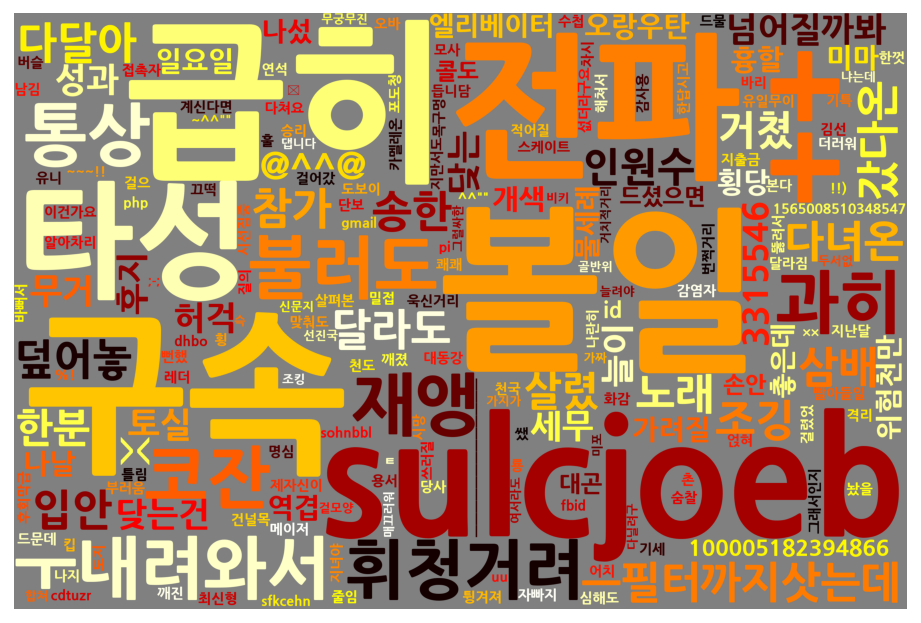

In [ ]:
plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()